In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/dataset/archive (1).zip'

Archive:  /content/drive/MyDrive/dataset/archive (1).zip
  inflating: Dataset/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.98884800_1554454572_spin.jpg  
  inflating: Dataset/Dataset/test_set/forest/01_NeilBurnell_Mystical_photoverticall.jpg  
  inflating: Dataset/Dataset/test_set/forest/091318_LH_forest_loss_main_FREE.jpg  
  inflating: Dataset/Dataset/test_set/forest/1009821.jpg  
  inflating: Dataset/Dataset/test_set/forest/111188170_river_in_the_mountain_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/1170x500_Ireland_web.jpg  
  inflating: Dataset/Dataset/test_set/forest/1200px_Mountainarea.jpg  
  inflating: Dataset/Dataset/test_set/forest/146019.jpg  
  inflating: Dataset/Dataset/test_set/forest/1506697583544.jpg  
  inflating

## Importing_the_ImageDataGenerator_library

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

#Define the parameters/arguments for ImageDataGenerator class

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

# Applying ImageDataGenerator functionality to trainset

In [ ]:
x_train=train_datagen.flow_from_directory('/content/Dataset/Dataset/train_set',
target_size=(128,128),batch_size=32,class_mode='binary')

Found 436 images belonging to 2 classes.


# Applying ImageDataGenerator functionality to trainset

In [ ]:
x_test=test_datagen.flow_from_directory('/content/Dataset/Dataset/test_set',
target_size=(128,128),batch_size=32,class_mode='binary')

Found 121 images belonging to 2 classes.


# importing the model building libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

initializing the model

In [ ]:
model=Sequential()

Adding CNN layers

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

Adding Dense Layers

In [ ]:
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Configuring The Learning Process

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

Training the model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 28s 2s/step - loss: 0.5663 - accuracy: 0.6995 - val_loss: 0.3476 - val_accuracy: 0.8678
Epoch 2/10
14/14 [==============================] - 25s 2s/step - loss: 0.2953 - accuracy: 0.8807 - val_loss: 0.2224 - val_accuracy: 0.9008
Epoch 3/10
14/14 [==============================] - 27s 2s/step - loss: 0.2230 - accuracy: 0.9037 - val_loss: 0.1062 - val_accuracy: 0.9669
Epoch 4/10
14/14 [==============================] - 26s 2s/step - loss: 0.2776 - accuracy: 0.8601 - val_loss: 0.1347 - val_accuracy: 0.9504
Epoch 5/10
14/14 [==============================] - 27s 2s/step - loss: 0.2025 - accuracy: 0.9174 - val_loss: 0.0762 - val_accuracy: 0.9835
Epoch 6/10
14/14 [==============================] - 26s 2s/step - loss: 0.1899 - accuracy: 0.9243 - val_loss: 0.0680 - val_accuracy: 0.9835
Epoch 7/10
14/14 [==============================] - 30s 2s/step - loss: 0.1664 - accuracy: 0.9266 - val_loss: 0.0795 - val_accuracy: 0.9669
Epoch 8/10
14/14 [==

save the model

In [ ]:
model.save("forest1.h5")

predictions

In [ ]:
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
model = load_model("forest1.h5")

In [ ]:
img=image.load_img('/content/Dataset/Dataset/test_set/with fire/Bandipur_fires_2019.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
x=np.expand_dims(res,axis=0)

In [ ]:
pred=model.predict(x)

1/1 [==============================] - 0s 157ms/step


In [ ]:
pred

array([[0.9935224]], dtype=float32)

Opencv for video processing

In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.8 MB/s 


In [ ]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=16946a747d47b1a53e9c8ff461c9890e500a2c76204e03f2c6c7ab7bb7d77923
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
pip install pygobject


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from logging import WARNING
import cv2
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
from twilio.rest import Client
from playsound import playsound

In [ ]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model=load_model('/content/forest1.h5')
video = cv2.VideoCapture(0)
name = ['forest','with fire']

In [ ]:
account_sid='AC793bc11a38751a7b2a8c3fc7f18105c5'
auth_token=' 26391d62b2b327c5a97725cad8a769ef'
client=Client(account_sid,auth_token)
message=client.messages \
.create(
    body='forest fire is detected,stay alert',
#use twilio free number
    from_='+18176708550',
#to number
    to='+918754125453')
print(message.sid)

SM26da8bea3349bb59af403d42b9bac77a


In [38]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
%matplotlib inline

In [ ]:
cap = cv2.VideoCapture(r'C:\Users\ELCOT\Videos')
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/forest1.h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()
from twilio.rest import Client
from playsound import playsound
if pred==0:
  account_sid='AC793bc11a38751a7b2a8c3fc7f18105c5'
  auth_token='26391d62b2b327c5a97725cad8a769ef'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+18176708550',
      #to number
      to='+918754125453')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")

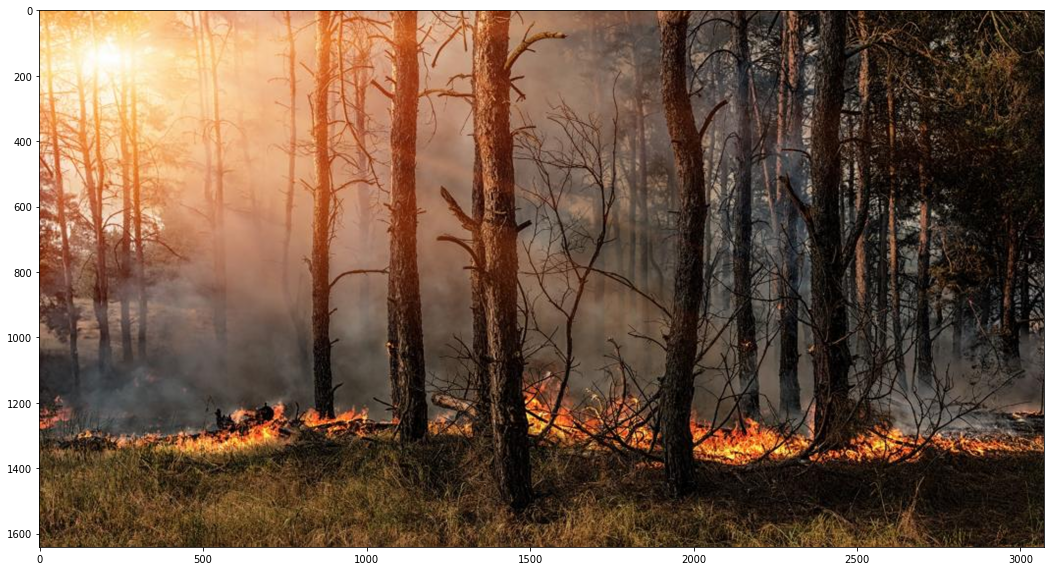

SM26da8bea3349bb59af403d42b9bac77a
Fire detected
SMS Sent!
